#### This is EDA of a Kaggle dataset called "USA Airline Delay Cause," created by user 'RYANJT.'

* The last update to this dataset appears to be in August 2022, initial date of publication unknown.

* Sources: https://www.transtats.bts.gov/ot_delay/ot_delaycause1.asp?qv52ynB=qn6n&20=E

* Collection Methodology: Bureau of Transportation Statistics, Airline Service Quality Performance 234

* The dataset covers the date range of 7/01/03 - 5/01/22.

* It is available at: https://www.kaggle.com/datasets/ryanjt/airline-delay-cause

First, we'll important necessary packages and ingest the .csv file containing the dataset.

In [6]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Read a .csv in with information about airline delays
delay_data = pd.read_csv('Airline_Delay_Cause.csv')

Next, we'll gather basic information about this dataset, to include:
* Shape
* Head observations
* Column information
* Missing/null values

In [11]:
# Shape of delay_data
delay_data.shape

(318017, 21)

In [12]:
# Visualize basic information about delay_data
delay_data.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [13]:
# Visualize information about the data types in the delay_data DataFrame
delay_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318017 non-null  object 
 3   carrier_name         318017 non-null  object 
 4   airport              318017 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317529 non-null  float64
 7   arr_del15            317289 non-null  float64
 8   carrier_ct           317529 non-null  float64
 9   weather_ct           317529 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317529 non-null  float64
 15  arr_delay        

Based on 'non-null count' above, there appears to be missing data. We'll investigate this by acquiring counts of 'NA' values and making sure it matches 'NULL' values.

Then, we can determine how much of the dataset is missing. It appears to be very minimal...

In [14]:
# Show missing/null data in each column

delay_data.isna().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            488
arr_del15              728
carrier_ct             488
weather_ct             488
nas_ct                 488
security_ct            488
late_aircraft_ct       488
arr_cancelled          488
arr_diverted           488
arr_delay              488
carrier_delay          488
weather_delay          488
nas_delay              488
security_delay         488
late_aircraft_delay    488
dtype: int64

In [15]:
# Last, we'll verify that the missing data is being captured correctly by pandas

delay_data.isna().sum() == delay_data.isnull().sum()

year                   True
month                  True
carrier                True
carrier_name           True
airport                True
airport_name           True
arr_flights            True
arr_del15              True
carrier_ct             True
weather_ct             True
nas_ct                 True
security_ct            True
late_aircraft_ct       True
arr_cancelled          True
arr_diverted           True
arr_delay              True
carrier_delay          True
weather_delay          True
nas_delay              True
security_delay         True
late_aircraft_delay    True
dtype: bool

The values match, so now we can determine how much of the dataset is missing.

Casually, 'arr_del15' is missing the most values, at 728. That equals less than one-quarter of 1% of all observations. (728/318017)

In [16]:
# Calculate missing values as a percentage of overall dataset.

delay_data.isna().sum() * 100 / len(delay_data)

year                   0.000000
month                  0.000000
carrier                0.000000
carrier_name           0.000000
airport                0.000000
airport_name           0.000000
arr_flights            0.153451
arr_del15              0.228919
carrier_ct             0.153451
weather_ct             0.153451
nas_ct                 0.153451
security_ct            0.153451
late_aircraft_ct       0.153451
arr_cancelled          0.153451
arr_diverted           0.153451
arr_delay              0.153451
carrier_delay          0.153451
weather_delay          0.153451
nas_delay              0.153451
security_delay         0.153451
late_aircraft_delay    0.153451
dtype: float64

As expected, missing values are a small percentage, we'll drop those and proceed to exploring the remaining data further to determine some relationships.

In [21]:
# drop 'NA' and make a new data frame 'No NA' to capture results. Check shape.
# DropNA was also verified, but removed for readability. It was '0' across the board.

delay_data_nona = delay_data.dropna()
delay_data_nona.shape

(317289, 21)

We are left with 317,289 observations. Let's get some basic information about the distribution of these observations and then seek to determine relationships. Below is an explanation of the columns, courtesy of Kaggle user ' BHAVANA' (https://www.kaggle.com/code/bhavanamaradani/usa-airline-delay-causes).

*"The data contains information of total arrived flights('arr_flights') of different carriers ('carrier_name') in a given month and year at a particular airport ('airport')*

*The column (arr_del15) is the total delay caused by five different causes for delay (carrier_ct, weather_ct,nas_ct, security_ct, late_aircraft_ct)*

*Similarly,(arr_delay) is the total delay caused by five different causes for delay (carrier_delay, weather_delay, nas_delay, security_delay ,late_aircraft_delay)*

*Though the columns 'arr_delay15' and 'arr_delay' convey similar information regarding the causes for delay. But, there is no clear infomation regarding the values and how they are connected.*

*Since, it is given that the delay information is in minutes for delayed flights alone. My analysis is based on assumption that column 'arr_delay' is the total delay (in minutes) of a particular carrier in a given month and airport."*

/var/folders/79/hh7cth4s3p3dbtdpc8j1m9bm0000gn/T/ipykernel_19215/2078695966.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=delay_data_nona, x='year', y='arr_del15', ci=None)


<AxesSubplot:xlabel='year', ylabel='arr_del15'>

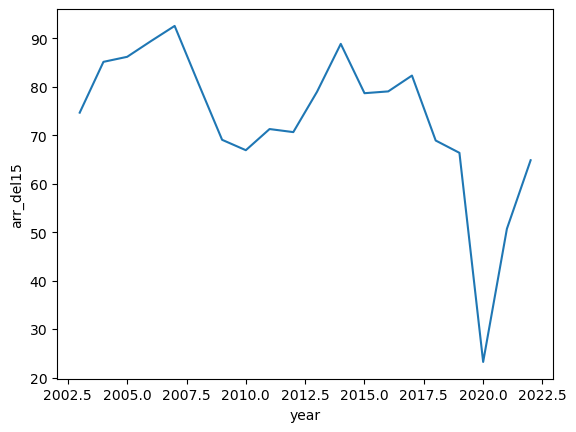

In [40]:
# Plot the total observations by year

sns.lineplot(data=delay_data_nona, x='year', y='arr_del15', ci=None)

/var/folders/79/hh7cth4s3p3dbtdpc8j1m9bm0000gn/T/ipykernel_19215/2137080576.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=delay_data_nona, x='month', y='arr_del15', ci=None)


<AxesSubplot:xlabel='month', ylabel='arr_del15'>

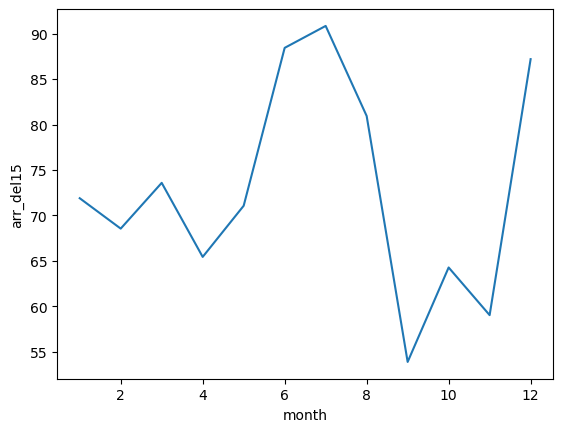

In [41]:
# Now let's look at month

sns.lineplot(data=delay_data_nona, x='month', y='arr_del15', ci=None)

As one would expect, the amount of delays increases significantly during summer months and around the holiday season. There is also a noticeable dip in the year 2020 (expected).

Next, we'll do some analysis to find possible linkages or relationships. I'll truncate this area.